<font size="6">Email Spam Classifier

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import tensorflow as tf

In [2]:
from tensorflow import keras

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
df=pd.read_csv("emails.csv.zip")
df.set_index("Email No.",inplace=True)

In [5]:
df.head()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
Email No.,,,,,,,,,,,,,,,,,,,,,
Email 1,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Email 2,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,1,0,0
Email 3,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,0
Email 4,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,0
Email 5,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,1,0,0


In the data set, there are 3000 features which are the frquency of common words in email.
<br />The last columns is the prediction whether the email is spam or not.
<br />0 - not spam
<br />1 - spam

In [6]:
#Split the whole dataset into feature matrix and prediction target
X=df[[feature for feature in list(df.columns) if feature!="Prediction"]]
y=df["Prediction"]

In [7]:
#check if there is missing value in feature matrix
count_is_missing=0
for feature in X.columns:
    if X[feature].isnull().sum()>0:
        count_is_missing+=1
print(count_is_missing)

0


In [8]:
#There is no missing data

<font size="5">Exploratory data analysis and Feature Engineering

There are different kinds of words in the feature. I would like to split the words into 2 categories first.
<br /> single_word - word with only one character
<br /> multiple_word - word with more than one character
<br />It is more common to see word with more than one character

In [9]:
single_word=[]
multiple_word=[]
for feature in X.columns:
    if len(feature)==1:
        single_word.append(feature)
    else:
        multiple_word.append(feature)

The proportion of spam emails

In [10]:
sum(y)/len(y)

0.2900232018561485

There are about 30% of spam emails

Filter out the columns which have low standard deviation,ie standard deviation < 1.
<br />The words which seldomly appear are not significant.

In [11]:
count_single_word_ls=0
for feature in single_word:
    if X[feature].std()<1:
        count_single_word_ls+=1
print(count_single_word_ls)

0


All words will single character do not have low standard deviation.

In [12]:
count_multiple_word_hs=0
for feature in multiple_word:
    if X[feature].std()<1:
        count_multiple_word_hs+=1
print(count_multiple_word_hs)

2724


There are 2724 words which seldomly apperar. Ther will not be considered now.

In [13]:
multiple_word_hs=[]
for feature in multiple_word:
    if df[feature].std()>=1:
        multiple_word_hs.append(feature)

<font size="5">
Modelling

Try diffrent models to build the classifier

<font size="4">Deep Neural Network

In [80]:
l1=len(multiple_word_hs)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X[multiple_word_hs], y,test_size=0.2,stratify=y)

In [28]:
feature=multiple_word_hs

In [63]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[len(feature)]))
model.add(keras.layers.Dense(200, activation = "relu"))
model.add(keras.layers.Dense(100, activation = "relu"))
model.add(keras.layers.Dense(1, activation = "sigmoid"))
model.compile(loss = "binary_crossentropy",optimizer = "sgd",metrics=[tf.keras.metrics.PrecisionAtRecall(recall=0.5)])

In [64]:
model.fit(X_train,y_train,epochs=50,validation_data=(X_test,y_test))

Epoch 1/50
130/130 [==============================] - 1s 3ms/step - loss: 0.9567 - precision_at_recall: 0.5097 - val_loss: 0.3630 - val_precision_at_recall: 0.8361
Epoch 2/50
130/130 [==============================] - 0s 1ms/step - loss: 0.3532 - precision_at_recall: 0.8848 - val_loss: 0.3101 - val_precision_at_recall: 0.8830
Epoch 3/50
130/130 [==============================] - 0s 1ms/step - loss: 0.2754 - precision_at_recall: 0.9415 - val_loss: 0.2942 - val_precision_at_recall: 0.9091
Epoch 4/50
130/130 [==============================] - 0s 1ms/step - loss: 0.2433 - precision_at_recall: 0.9439 - val_loss: 0.2767 - val_precision_at_recall: 0.8778
Epoch 5/50
130/130 [==============================] - 0s 1ms/step - loss: 0.2089 - precision_at_recall: 0.9613 - val_loss: 0.2423 - val_precision_at_recall: 0.9615
Epoch 6/50
130/130 [==============================] - 0s 1ms/step - loss: 0.1909 - precision_at_recall: 0.9704 - val_loss: 0.2247 - val_precision_at_recall: 0.9273
Epoch 7/50
130/1

In [65]:
(model.predict(X_test)>0.5)

array([[False],
       [ True],
       [ True],
       ...,
       [ True],
       [False],
       [ True]])

In [66]:
feature=multiple_word_ls
X_train, X_test, y_train, y_test = train_test_split(X[feature], y,test_size=0.2,stratify=y)
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[len(feature)]))
model.add(keras.layers.Dense(200, activation = "relu"))
model.add(keras.layers.Dense(100, activation = "relu"))
model.add(keras.layers.Dense(1, activation = "sigmoid"))
model.compile(loss = "binary_crossentropy",optimizer = "sgd",metrics="accuracy")
model.fit(X_train,y_train,epochs=50,validation_data=(X_test,y_test))

RuntimeError: Data adapters should be mutually exclusive for handling inputs. Found multiple adapters [<class 'tensorflow.python.keras.engine.data_adapter.TensorLikeDataAdapter'>, <class 'tensorflow.python.keras.engine.data_adapter.GeneratorDataAdapter'>] to handle input: <class 'pandas.core.frame.DataFrame'>, <class 'pandas.core.series.Series'>

In [72]:
import sympy as sp

In [74]:
#sp.Matrix(X[multiple_word_ls]).rref()

In [75]:
from sklearn.decomposition import PCA

In [76]:
from sklearn.ensemble import GradientBoostingClassifier

In [77]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import roc_auc_score

In [83]:
pca = PCA(n_components=0.9)

In [88]:
X_pca=pca.fit_transform(X[multiple_word_hs])
pca.n_components_

16

In [89]:
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_pca, y,test_size=0.3,stratify=y)

In [90]:
GB=GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=2)
clf_GB=GB.fit(X_train_p,y_train_p)
clf_GB.score(X_test_p,y_test_p)

0.8846649484536082

In [92]:
best_score=0
for max_depth in range(1,6):
    for lr in [1,0.5,0.1,0.05]:
        GB=GradientBoostingClassifier(n_estimators=100, learning_rate=lr,max_depth=max_depth)
        clf_GB=GB.fit(X_train_p,y_train_p)
        score=clf_GB.score(X_test_p,y_test_p)
        if score>best_score:
            model=clf_GB
        print(max_depth,lr,score)

1 1 0.865979381443299
1 0.5 0.8595360824742269
1 0.1 0.836340206185567
1 0.05 0.8067010309278351
2 1 0.8846649484536082
2 0.5 0.8807989690721649
2 0.1 0.8653350515463918
2 0.05 0.8524484536082474
3 1 0.8846649484536082
3 0.5 0.8969072164948454
3 0.1 0.8756443298969072
3 0.05 0.875
4 1 0.8775773195876289
4 0.5 0.8949742268041238
4 0.1 0.8878865979381443
4 0.05 0.8807989690721649
5 1 0.8865979381443299
5 0.5 0.895618556701031
5 0.1 0.8949742268041238
5 0.05 0.8853092783505154


In [93]:
model

GradientBoostingClassifier(learning_rate=0.05, max_depth=5)

In [94]:
f1_score(y_test_p,model.predict(X_test_p))

0.7905882352941176

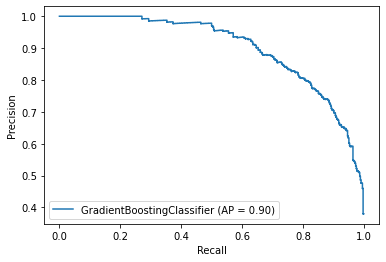

In [95]:
disp = plot_precision_recall_curve(model, X_test_p, y_test_p)

In [96]:
roc_auc_score(y_test_p,model.predict(X_test_p))

0.8442952208106472

In [100]:
pca = PCA(n_components=0.95)
X_pca=pca.fit_transform(X[multiple_word_hs+single_word])
pca.n_components_

3

In [103]:
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_pca, y,test_size=0.2,stratify=y)
GB=GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=3)
clf_GB=GB.fit(X_train_p,y_train_p)
clf_GB.score(X_test_p,y_test_p)

0.7632850241545893

In [121]:
def test_pca(f,fraction):
    pca = PCA(n_components=fraction)
    X_pca=pca.fit_transform(X[f])
    return X_pca,pca.n_components_

In [136]:
test_pca(multiple_word_hs,0.98)[1]

77

In [137]:
feature=multiple_word_hs
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(test_pca(feature,0.98)[0], y,test_size=0.2,stratify=y)
GB=GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=3)
clf_GB=GB.fit(X_train_p,y_train_p)
clf_GB.score(X_test_p,y_test_p)

0.9227053140096618

In [169]:
for word in single_word:
    print(word,X[word].std())

a 87.57417215302422
i 77.83222134557691
s 66.53003234804453
e 126.84550860086814
d 37.982822654574086
t 94.81531931714301
j 6.251980745203282
l 47.75650739479314
m 36.14048667373415
b 20.47025376194114
p 28.56735002571789
o 85.30076438211206
c 51.64292349339328
r 71.56791087465915
w 17.466854811170318
x 5.491958025573854
k 10.782849615383574
f 23.536181138226418
h 40.64931214069405
u 31.504662195507844
n 76.875463459251
g 22.092064371678827
v 12.495845086896008
y 19.70256872527176
z 4.261909706345173
q 4.088376033907151


In [139]:
for word in single_word:
    print(df.groupby("Prediction")[word].mean())

Prediction
0    49.485566
1    70.283333
Name: a, dtype: float64
Prediction
0    37.150327
1    67.174000
Name: i, dtype: float64
Prediction
0    36.092320
1    55.813333
Name: s, dtype: float64
Prediction
0     78.294935
1    100.708000
Name: e, dtype: float64
Prediction
0    21.315359
1    31.736667
Name: d, dtype: float64
Prediction
0    55.259532
1    73.252000
Name: t, dtype: float64
Prediction
0    3.903050
1    3.482667
Name: j, dtype: float64
Prediction
0    27.632081
1    39.234667
Name: l, dtype: float64
Prediction
0    19.166939
1    25.862000
Name: m, dtype: float64
Prediction
0    10.676198
1    17.268667
Name: b, dtype: float64
Prediction
0    14.571623
1    24.578000
Name: p, dtype: float64
Prediction
0    49.284586
1    69.331333
Name: o, dtype: float64
Prediction
0    27.371732
1    36.120667
Name: c, dtype: float64
Prediction
0    39.550381
1    59.763333
Name: r, dtype: float64
Prediction
0     9.90305
1    14.60800
Name: w, dtype: float64
Prediction
0    2.082244
1 

In [131]:
c=0
for feature in X.columns:
    if X[feature].std()<1:
        c+=1
c

2724

In [127]:
words=multiple_word_hs

In [128]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[len(words)]))
model.add(keras.layers.Dense(200, activation = "relu"))
model.add(keras.layers.Dense(100, activation = "relu"))
model.add(keras.layers.Dense(1, activation = "sigmoid"))
model.compile(loss = "binary_crossentropy",optimizer = "sgd",metrics =["accuracy"])

In [129]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X[words], y,test_size=0.2,stratify=y)

In [130]:
model.fit(X_train_1,y_train_1,epochs=50,validation_data=(X_test_1,y_test_1))

Epoch 1/50
130/130 [==============================] - 0s 2ms/step - loss: 0.6956 - accuracy: 0.7315 - val_loss: 0.3818 - val_accuracy: 0.8454
Epoch 2/50
130/130 [==============================] - 0s 1ms/step - loss: 0.3549 - accuracy: 0.8427 - val_loss: 0.3099 - val_accuracy: 0.8783
Epoch 3/50
130/130 [==============================] - 0s 1ms/step - loss: 0.2955 - accuracy: 0.8667 - val_loss: 0.2733 - val_accuracy: 0.9072
Epoch 4/50
130/130 [==============================] - 0s 1ms/step - loss: 0.2245 - accuracy: 0.9096 - val_loss: 0.2527 - val_accuracy: 0.9005
Epoch 5/50
130/130 [==============================] - 0s 1ms/step - loss: 0.2292 - accuracy: 0.9020 - val_loss: 0.3098 - val_accuracy: 0.8792
Epoch 6/50
130/130 [==============================] - 0s 1ms/step - loss: 0.2578 - accuracy: 0.9106 - val_loss: 0.2022 - val_accuracy: 0.9198
Epoch 7/50
130/130 [==============================] - 0s 1ms/step - loss: 0.1904 - accuracy: 0.9268 - val_loss: 0.1932 - val_accuracy: 0.9256
Epoch 

In [142]:
for word in single_word:
    print(df.groupby("Prediction")[word].sum()/df[word].sum())

Prediction
0    0.632839
1    0.367161
Name: a, dtype: float64
Prediction
0    0.575165
1    0.424835
Name: i, dtype: float64
Prediction
0    0.612857
1    0.387143
Name: s, dtype: float64
Prediction
0    0.655551
1    0.344449
Name: e, dtype: float64
Prediction
0    0.621807
1    0.378193
Name: d, dtype: float64
Prediction
0    0.648718
1    0.351282
Name: t, dtype: float64
Prediction
0    0.73287
1    0.26713
Name: j, dtype: float64
Prediction
0    0.632902
1    0.367098
Name: l, dtype: float64
Prediction
0    0.644668
1    0.355332
Name: m, dtype: float64
Prediction
0    0.602141
1    0.397859
Name: b, dtype: float64
Prediction
0    0.592062
1    0.407938
Name: p, dtype: float64
Prediction
0    0.63506
1    0.36494
Name: o, dtype: float64
Prediction
0    0.649745
1    0.350255
Name: c, dtype: float64
Prediction
0    0.618327
1    0.381673
Name: r, dtype: float64
Prediction
0    0.623996
1    0.376004
Name: w, dtype: float64
Prediction
0    0.541042
1    0.458958
Name: x, dtype: floa